**Part 3B**

**Instructions:**

See the instructions in the pdf file provided in **Instructions and details for all parts**

- Use this notebook to 
> - show the work you carried out to produce a prediction model and comma delimited file with your predictions of DSHARES in the test dataset.
> - show the work you carried out to produce your estimate of M, the mean absolute error in predicting log(1+DSHARES)
> - provide your estimate of M in the cell provided
- You need to upload the comma delimited file for part 3A 
- You need to upload this notebook or part 3B.

Use any number of cells you need to for your work. 
Make sure you assign a value to M and print it in the last (print) cell provided.

In [304]:
import pandas as pd
import numpy as np
import random as random
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import datetime as dt

testdata=pd.read_csv("test000.csv")
traindata=pd.read_csv("train000.csv")
traindata["TRANS_DATE"] = pd.to_datetime(traindata["TRANS_DATE"])
traindata['TRANS_DATE']=traindata['TRANS_DATE'].map(dt.datetime.toordinal)
traindata["DSHARES"] = np.log(1+traindata["DSHARES"])

testdata["TRANS_DATE"] = pd.to_datetime(testdata["TRANS_DATE"])
test_data_save=testdata["TRANS_DATE"]
testdata['TRANS_DATE']=testdata['TRANS_DATE'].map(dt.datetime.toordinal)
#traindata.loc[traindata.DSHARES>10**8,"DSHARES"]=np.nan


#NOTE: "traindata" is split randomly to model and then approximate M, the "test" data is just to extrapolate
N=100
M_best=10*100
best_iter=0
dict={}
for iter in range(N):
    #ratio of train/test data
    nratio=0.1+0.8*random.random()
    n=traindata.shape[0]
    nlist=list(np.arange(0,n))
    
    #bootstrap splitting up data set into test/train
    random.shuffle(nlist)
    ntrain_idx = nlist[0:round(nratio*n)]
    ntest_idx = nlist[round(nratio*n)+1:n]
    ntrain_idx.sort()
    ntest_idx.sort()
    traindata_post=traindata.iloc[ntrain_idx]
    testdata_post=traindata.iloc[ntest_idx]

    #prepare data
    DATA=traindata_post.loc[:,["TRANS_DATE","ASHARES","TRANS_PRICEPERSHARE","DSHARES"]].values
    X=DATA[:,0:3]
    Y=DATA[:,3]
    
    #fit model
    reg= LinearRegression().fit(X,Y)
    reg.coef_
    beta=reg.intercept_
    beta_0=reg.coef_[0]
    beta_1=reg.coef_[1]
    beta_2=reg.coef_[2]
    Y_pred=beta+beta_0*DATA[:,0]+beta_1*DATA[:,1]+beta_2*DATA[:,2]

    #predict M
    DATA_TEST=testdata_post.loc[:,["TRANS_DATE","ASHARES","TRANS_PRICEPERSHARE","DSHARES"]].values
    Y_pred=beta+beta_0*DATA_TEST[:,0]+beta_1*DATA_TEST[:,1]+beta_2*DATA_TEST[:,2]
    Y_test=DATA_TEST[:,3]
    sum=0
    k=len(Y_pred)
    for i in range(k):
        #sum += np.abs(np.log(1+max(0,Y_pred[i]))-np.log(1+Y_test[i]))
        sum += np.abs(Y_pred[i]-Y_test[i])
    dict[iter]=(nratio,reg.coef_,reg.intercept_,sum/k)
    
    #update best M prediction
    if sum/k < M_best:
        M_best=sum/k
        best_iter=iter
M=M_best
info_save=dict[best_iter]

In [305]:
#fit actual test data
coeff=info_save[1]
testing_DATA=testdata.loc[:,["TRANS_DATE","ASHARES","TRANS_PRICEPERSHARE"]].values
beta=info_save[2]
beta_0=coeff[0]
beta_1=coeff[1]
beta_2=coeff[2]
Y_pred_test=beta+beta_0*testing_DATA[:,0]+beta_1*testing_DATA[:,1]+beta_2*testing_DATA[:,2]

#plot
#plt.scatter(testdata.index,Y_pred_test,s=1)

#undo log regulation
DSHARES_pred=(np.exp(Y_pred_test)-1)

final_data=list(zip(test_data_save, DSHARES_pred))
test_pred_df=pd.DataFrame(final_data,columns=['TRANS_DATE','DSHARES'])
test_pred_df['TRANS_DATE']=pd.to_datetime(test_pred_df['TRANS_DATE'])

test_pred_df.to_csv("3A_data.csv",index=False) 

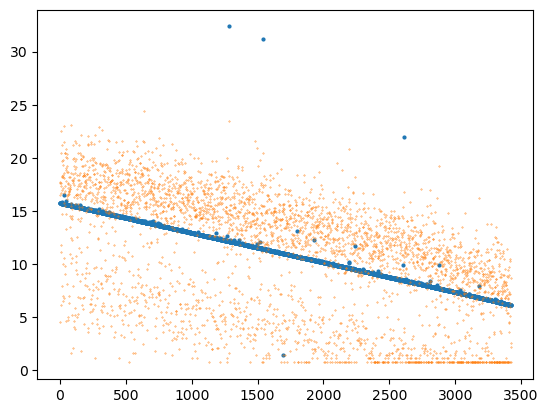

In [306]:
coeff=dict[best_iter][1]
testing_DATA=traindata.loc[:,["TRANS_DATE","ASHARES","TRANS_PRICEPERSHARE","DSHARES"]].values
beta=dict[best_iter][2]
beta_0=coeff[0]
beta_1=coeff[1]
beta_2=coeff[2]
Y=testing_DATA[:,3]
Y_pred_test=beta+beta_0*testing_DATA[:,0]+beta_1*testing_DATA[:,1]+beta_2*testing_DATA[:,2]
plt.scatter(traindata.index,Y_pred_test,s=4)
plt.scatter(traindata.index,Y,s=0.1)

In the following cell assign a value to the variable **M**.

In [307]:
# Print cell for M - do not modify or delete this line
# Do execute it
print(M)

3.914444068970363


**Make sure you successfully print the value of M in the cell above**

**Make sure you save your notebook before submitting it**